# Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# train test split
from sklearn.model_selection import train_test_split

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# Random Forest package
from sklearn.ensemble import RandomForestClassifier
# SVM 
from sklearn.svm import SVC


# create a pipeline 
from sklearn.pipeline import Pipeline

# for evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# 1. Load Data & Exploration

In [137]:
df = pd.read_csv('/Users/krieger/Desktop/spam_classification/spam.tsv', sep = '\t')

In [138]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [139]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [140]:
# Getting a distribution of the labels.
# What we can see is the that the dataset is very imbalanced
df['label'].value_counts() / len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [141]:
#

ham = df[df['label'] == 'ham']
# resample the dfs
ham = ham.sample(spam.shape[0])

spam = df[df['label'] == 'spam']

In [142]:
(ham.shape, spam.shape)

((747, 4), (747, 4))

In [143]:
data = ham.append(spam, ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Yeah that's the impression I got,32,1
1,ham,Shopping? Eh ger i toking abt syd leh...Haha,44,4
2,ham,He's really into skateboarding now despite the...,154,1
3,ham,"That's fine, have him give me a call if he kno...",83,2
4,ham,Have you bookedthe hut? And also your time off...,71,3


In [144]:
data.shape

(1494, 4)

In [145]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [146]:
data.head()

,label,message,length,punct
0,ham,Yeah that's the impression I got,32,1
1,ham,Shopping? Eh ger i toking abt syd leh...Haha,44,4
2,ham,He's really into skateboarding now despite the...,154,1
3,ham,"That's fine, have him give me a call if he kno...",83,2
4,ham,Have you bookedthe hut? And also your time off...,71,3


## 2. Visualization

### Text length

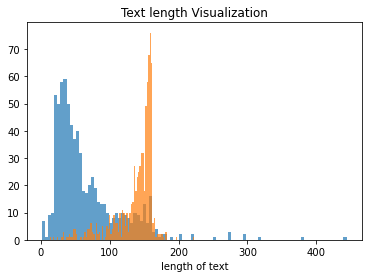

In [147]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.xlabel('length of text')
plt.title('Text length Visualization')
plt.show()

We can see a difference between long texts and short texts. 
For example, short texts seem to be ham while longer texts seem to spam (orange)

### Punctuation 

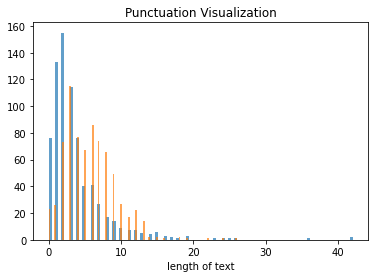

In [148]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.xlabel('length of text')
plt.title('Punctuation Visualization')
plt.show()

There is no big difference between spam and non-spam in this text

# 3. Train Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], 
                test_size = 0.3, 
                random_state = 0, 
                shuffle = True)

# 4. Building the Model

## 4.1 Random Forest

In [150]:
# initiate the pipeline object
classifier = Pipeline([('tfidf', TfidfVectorizer()) , ('classifier', RandomForestClassifier(n_estimators= 100))])

In [151]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [152]:
# Predicting the results
y_pred = classifier.predict(X_test)

In [153]:
# Accuracy
print(accuracy_score(y_test, y_pred))

# pretty high accuracy



# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

# High TN rate 


# Get a classification report
print(classification_report(y_test, y_pred))


0.9532293986636972
[[224   3]
 [ 18 204]]
              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



## 4.2 Support Vector Machine

In [154]:
# initiate the pipeline object
svm = Pipeline([('tfidf', TfidfVectorizer()) , ('classifier', SVC(C = 100, gamma = 'auto'))])

In [155]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [156]:
# Predicting the results
y_pred = svm.predict(X_test)

# Accuracy
print(accuracy_score(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))
# clasifcation 
print(classification_report(y_test, y_pred))

0.9465478841870824
[[221   6]
 [ 18 204]]
              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       227
        spam       0.97      0.92      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# 5. Test on new Data

In [135]:
test1 = ['Hello, You are learning natural language Processing'] # ham
test2 = ['Hope you are good and learning new things'] # ham
test3 = ['Congratulations, You won a lottery ticket worth $1 million! To claim call on 446677'] # spam

In [161]:
# Random Forest
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [163]:
# Support Vector Machine
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
